<a href="https://colab.research.google.com/github/Reyqq/learning/blob/main/%D0%91%D1%83%D1%81%D1%82%D0%B8%D0%BD%D0%B3%D0%B8/%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B8_%D0%B2_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%BC_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ансамблевые методы в машинном обучении

**Ансамбль (ensemble) в машинном обучении** — метод машинного обучения, где несколько моделей обучаются для решения одной и той же проблемы и объединяются для получения лучших результатов называется ансамблевым методом. Основная предпосылка заключается в том, что результат работы нескольких моделей будет более точен, чем результат только одной модели.

Когда говорится об ансамблях, то вводится понятие слабого ученика(обычные модели вроде линейной регрессии или дерева решений). Множество слабых учеников являются строительными блоками для более сложных моделей. Объединение слабых учеников для улучшения качества модели, уменьшения смещения или разброса, называется сильным учеником.

# Для чего нужен ансамбль?
1. **Улучшение точности:** Ансамблевые методы часто дают более точные предсказания по сравнению с отдельными моделями. Это связано с тем, что ошибки разных моделей могут компенсировать друг друга.
2. **Уменьшение дисперсии:** Они помогают уменьшить дисперсию модели, что снижает риск переобучения.
3. **Устойчивость:** Ансамбли менее чувствительны к отдельным ошибкам или шуму в данных, так как объединяют результаты нескольких моделей.

# Зачем применяется ансамбль?

Ансамбли применяются для улучшения производительности моделей в различных задачах машинного обучения, таких как классификация, регрессия и кластеризация. Они особенно полезны, когда:
- Одна модель не может достичь необходимой точности.
- Необходимо уменьшить риск переобучения.
- Данные содержат шум или выбросы.

# Виды ансамблевых методов
Наиболее популярными ансамблевыми методами являются: **стекинг(stacking)**, **бэггинг(bagging)**, **бустинг(boosting)**.
- **Cтекинг(stacking)**. Используется несколько разнородных слабых учеников. Их обучают и объединяют для построения прогноза, основанного на результатах различных слабых моделей.

- **Бэггинг(bagging)**. В этом случае однородные модели обучают на разных наборах данных и объединяют. Получают прогноз путём усреднения. Если использовать в качестве слабого ученика деревья решений, то получится случайный лес **RandomForestClassifier / RandomForestRegressor**.

- **Бустинг(boosting)**. При использовании данного метода несколько однородных моделей последовательно обучаются, исправляя ошибки друг друга.

# Cтекинг(stacking)

Это мощный ансамблевый метод, который позволяет объединить предсказания нескольких моделей для получения более точных и надёжных результатов.

Основная идея стекинга состоит в том, чтобы обучить несколько моделей, обычно с разными типами алгоритмов (также называемых базовыми моделями или базовыми учениками), на одном и том же наборе тренировочных данных. Затем вместо того, чтобы выбирать лучшую модель, предсказания всех базовых моделей агрегируются с использованием другой модели (мета-модели или мета-ученика) для получения окончательного прогноза. Входные данные для мета-модели — это результаты предсказаний базовых моделей.

 Правильное применение стекинга требует тщательного выбора базовых моделей и мета-модели, а также настройки параметров для каждой модели.

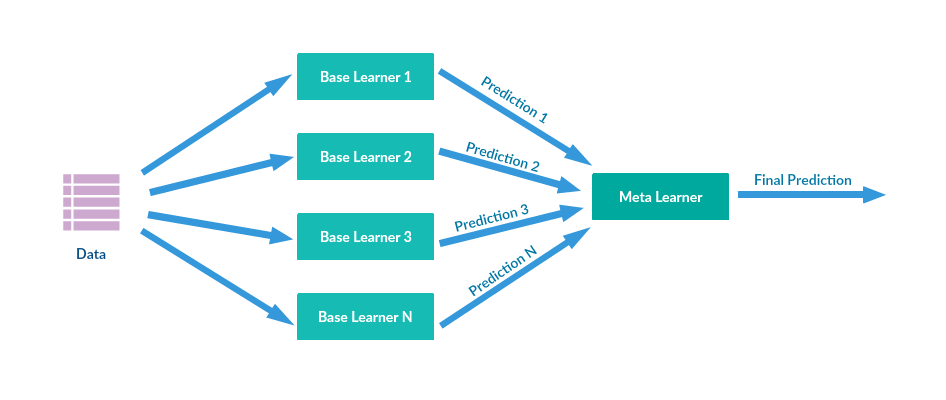

# Преимущества данного метода:

- Он может использовать алгоритмы разного типа, а не только из какого-то фиксированного семейства. Например, в качестве базовых алгоритмов могут выступать метод ближайших соседей и линейная регрессия.

- Результаты базовых алгоритмов объединяются в один с помощью обучаемой мета-модели, а не с помощью какого-либо обычного способа агрегации (суммирования или усреднения)

- **Улучшение точности:** Стекинг часто улучшает точность моделей, так как использует преимущества различных алгоритмов.

- **Снижение переобучения:** Мета-модель помогает уменьшить риск переобучения, комбинируя предсказания базовых моделей.

- **Гибкость:** Можно использовать различные алгоритмы и модели в качестве базовых, что делает стекинг очень гибким подходом.

# Обучение стекинга проходит в несколько этапов:

1. Общая выборка разделяется на тренировочную и тестовую.
2. Тренировочная выборка делится на фолдов. Затем эти фолды перебираются тем же способом, что используется при кросс-валидации: на каждом шаге фиксируются $(n-1)$ фолдов для обучения базовых алгоритмов и один — для их предсказаний (вычисления мета-факторов). Такой подход нужен для того, чтобы можно было использовать всё тренировочное множество, и при этом базовые алгоритмы не переобучались.

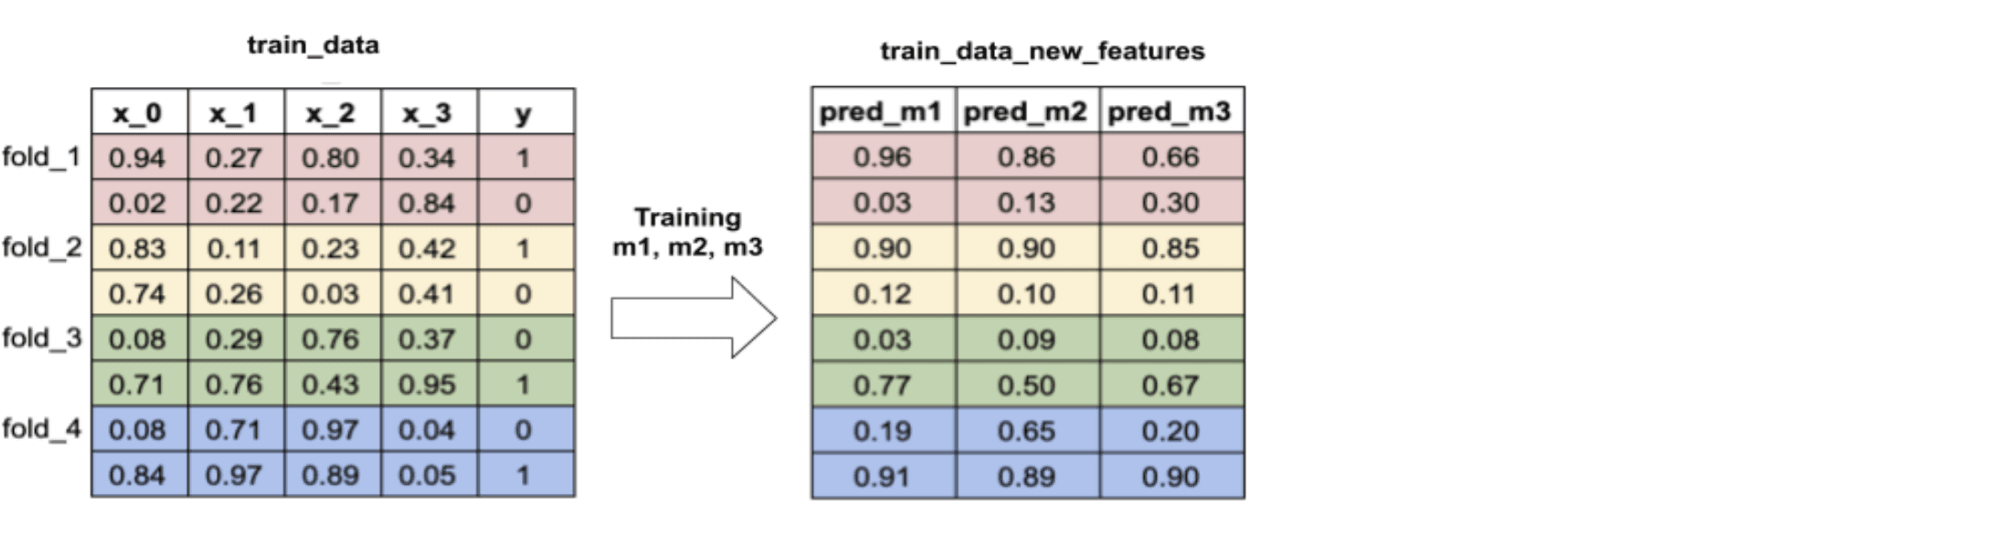

3. На полученных мета-факторах обучается мета-модель. Кроме мета-факторов, она может принимать на вход и фичи из исходного датасета. Выбор зависит от решаемой задачи.

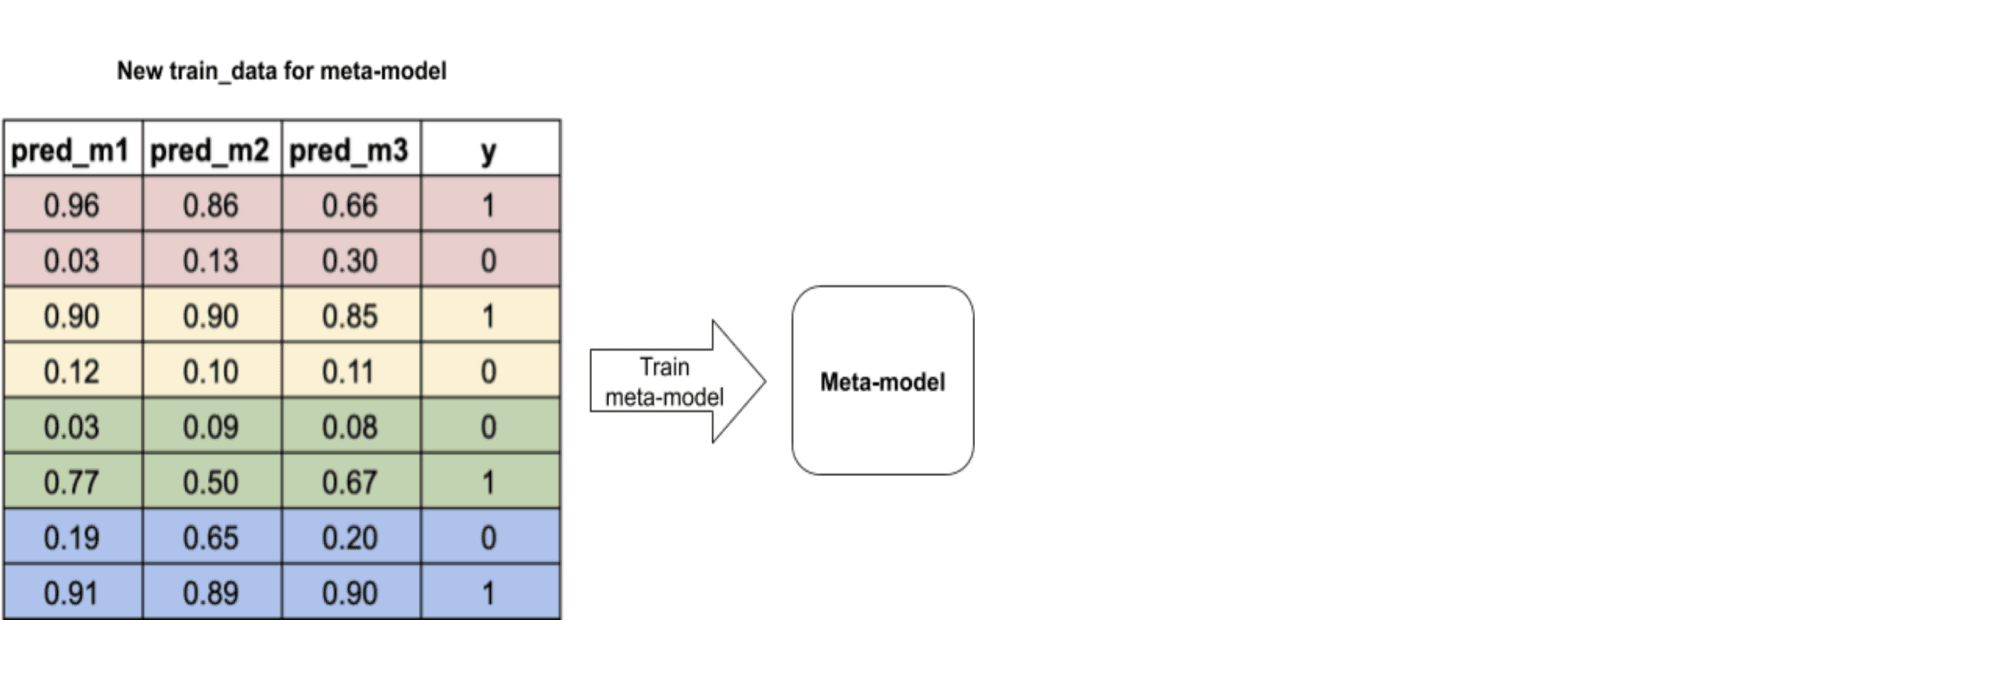

Для получения мета-факторов на тестовом множестве базовые алгоритмы можно обучить на всём тренировочном множестве — переобучения в данном случае возникнуть не должно.

Если данных достаточно много, то можно просто разделить обучающие данные на две непересекающиеся части: ту, на которой учатся базовые алгоритмы, и ту, на которой они делают свои предсказания и обучается мета-модель. Использование такого простого разбиения вместо кросс-валидации на тренировочных данных иногда называют **блендингом (blending)**. Если данных совсем много, то тестовое множество тоже можно разделить на две части: тестовую и валидационную, и использовать последнюю для подбора гиперпараметров моделей-участников.

# Заключение
Стекинг не минимизирует смещение и разброс напрямую. Вместо этого он фокусируется на уменьшении общей ошибки модели за счёт оптимального комбинирования предсказаний различных базовых моделей. Уменьшение общей ошибки, в свою очередь, приводит к снижению смещения и разброса, но не является прямой целью процесса стекинга.


# Бэггинг(bagging)
Основная идея **бэггинга(bagging, от слова "bootstrap aggregating")** заключается в том, чтобы обучить несколько одинаковых моделей на разных образцах. Распределение выборки неизвестно, поэтому модели получатся разными.

